In [1]:
#For downloads
import gdown, os, gzip, shutil

# Basic data management and plotting
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import os

# Scanpy fundamentals
import anndata as ad
import scanpy as sc
import seaborn as sb

# sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(figsize=(6, 6))
import scvi
from scvi.external import SOLO

/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


# Find markers/ label cell types

Cell labelling or cell annotation, is a pivotal step in single-cell RNA sequencing (scRNA-seq) data analysis. Its primary objective is to categorize individual cells into biologically meaningful groups or states based on their gene expression profiles. This process enables researchers to interpret the cellular heterogeneity within a sample and understand the functional diversity of cell populations.

In single-cell experiments, each cell can exhibit unique gene expression patterns influenced by various factors such as cell type, developmental stage, and environmental stimuli. Cell labelling aims to decipher these patterns by assigning informative labels or annotations to each cell, providing insights into its identity and functional characteristics.

The cell labelling process typically involves several key steps:

1. Identification of marker genes: Marker genes are genes whose expression levels are indicative of specific cell types or states. These genes serve as molecular signatures that distinguish one cell type from another. Cell labelling begins by identifying relevant marker genes associated with known cell types or biological processes.

2. Cell clustering: Clustering algorithms are applied to group cells with similar gene expression profiles into distinct clusters. Each cluster represents a putative cell type or functional state within the sample. Cell labelling involves assigning biological labels to these clusters based on the expression patterns of marker genes.

3. Validation and refinement: Once initial cell labels are assigned, they are validated and refined through manual curation or computational methods. This may involve visual inspection of gene expression patterns, comparison with known cell types from external databases, or integration of additional experimental data.

4. Functional annotation: In addition to assigning cell type labels, cell labelling may involve functional annotation of cell populations based on their gene expression signatures. This can include identifying enriched biological pathways, predicting cellular functions, or characterizing cell-cell interactions within the sample.

##  Manual vs Automated methods for cell annotation

**Manual Cell Annotation**

Manual cell annotation involves an expert or someone with knowledge inspecting gene expression patterns and assigning cell types or states based on their domain knowledge and visual interpretation of the data. This method for cell annotation offer the benefits of leveraging expert knowledge and biological intuition, facilitating transparent and interpretable results, enabling rigorous quality control, and allowing integration of prior knowledge from the literature or external databases.

**Automated Cell Annotation**

Automated cell annotation employs computational algorithms to classify cells into distinct groups or states based on their gene expression profiles. These methods leverage machine learning, clustering, and dimensionality reduction techniques to identify cell types and characterize cellular heterogeneity in an unbiased manner. Automated annotation offers scalability, reproducibility, and can handle large datasets efficiently. However, it may require careful parameter tuning and validation to ensure accurate results.

Commonly Used Automated Algorithms:

1. Seurat: Seurat is a widely used R package for single-cell data analysis, which includes functions for clustering cells based on their gene expression profiles and annotating cell clusters using reference datasets or marker gene analysis.

2. SCENIC (Single-Cell Regulatory Network Inference and Clustering): SCENIC integrates single-cell gene expression data with transcription factor binding motifs to infer cell states and regulatory networks. It enables automated annotation of cell types and identification of key regulatory pathways.

3. CellAssign: CellAssign is a probabilistic framework for cell type identification in scRNA-seq data. It uses reference datasets and Bayesian inference to assign cell types to individual cells based on their gene expression profiles.

4. SingleR: SingleR is an R package that predicts cell types in scRNA-seq data by comparing gene expression profiles to reference datasets from known cell types. It uses machine learning algorithms such as nearest neighbors and support vector machines for classification.

5. RaceID: RaceID is a clustering algorithm designed specifically for single-cell RNA-seq data. It integrates dynamic time warping and density-based clustering to identify cell clusters and annotate cell types based on gene expression patterns.

**Here we employ manual cell annotation method since the reference information, such as atlases, for liver was not found with the same quality with which the lung atlas or similar can be found.**

In [2]:
adata = sc.read_h5ad('/datos/home/jupyter-mdiaz/scRNAseq_pipeline/adata_saved/P3_integrated.h5ad')

In [3]:
model_dir = '/datos/home/jupyter-mdiaz/scRNAseq_pipeline/adata_saved/saved_model/'
model = scvi.model.SCVI.load(model_dir)

INFO     File /datos/home/jupyter-mdiaz/scRNAseq_pipeline/adata_saved/saved_model/model.pt already downloaded      


/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:758: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/opt/tljh/user/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public c

In [4]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 1)

/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:401: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


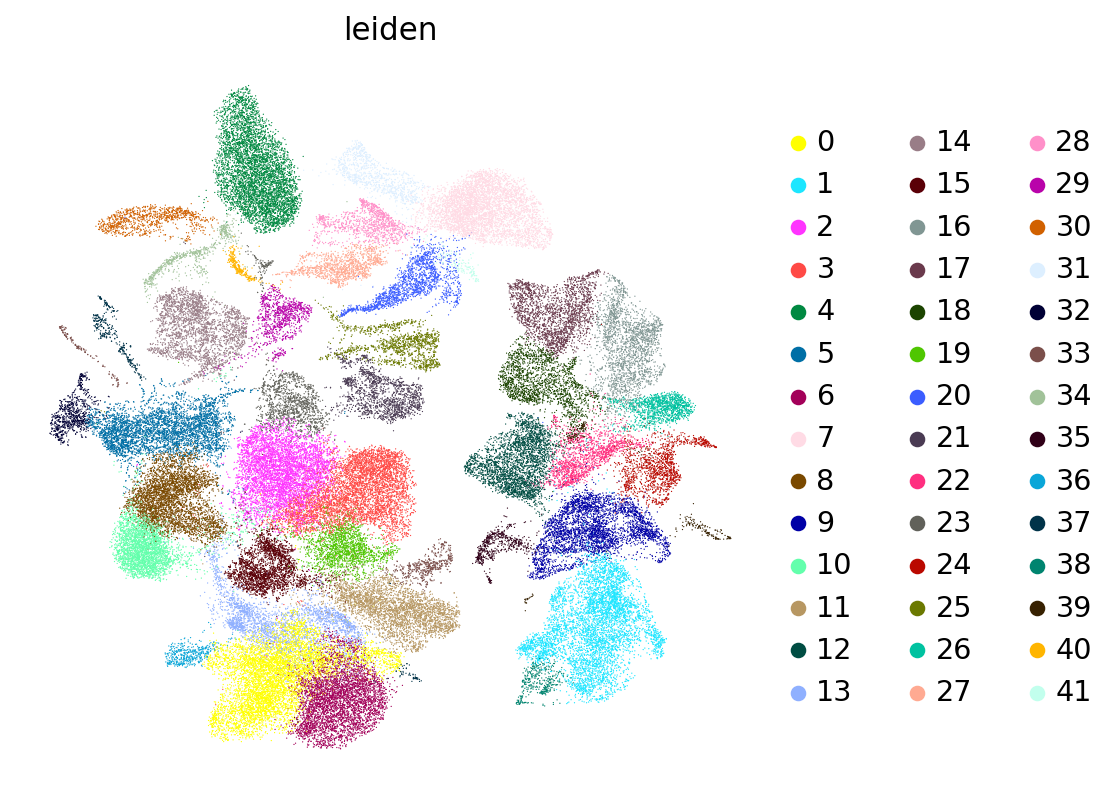

In [5]:
sc.pl.umap(adata, color = ['leiden'], frameon = False)

/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:401: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


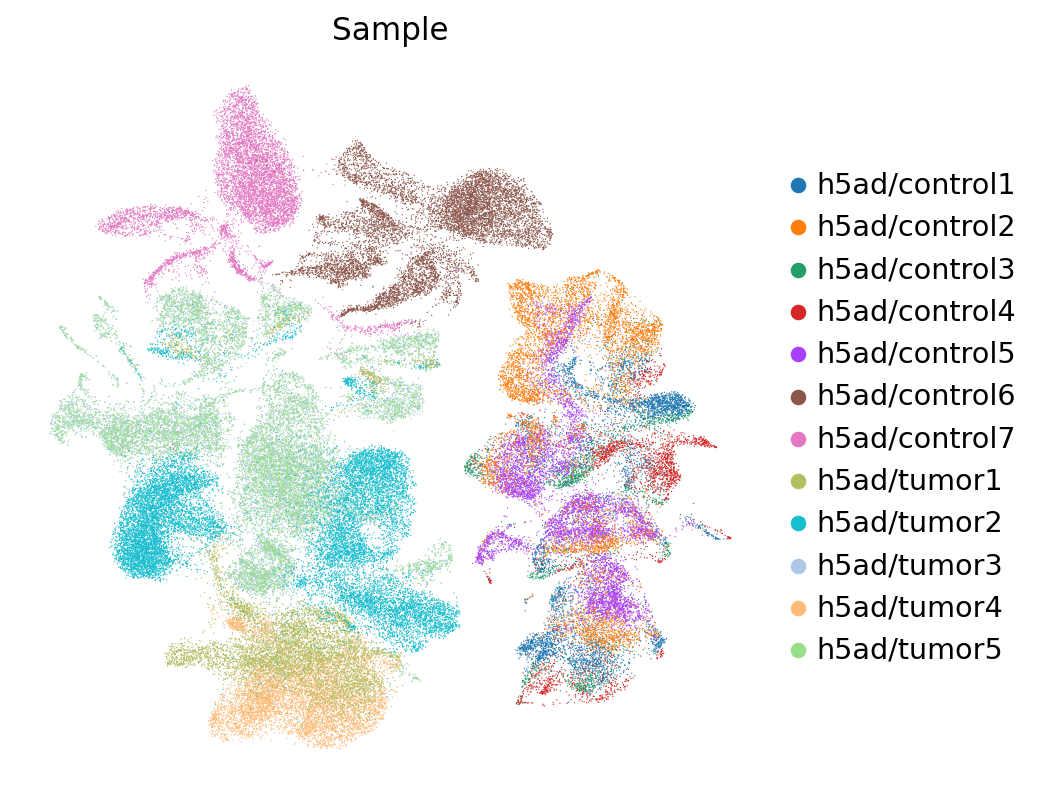

In [6]:
sc.pl.umap(adata, color = ['Sample'], frameon = False)

In [7]:
sc.tl.rank_genes_groups(adata, 'leiden', method = 'wilcoxon')

/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:419: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:421: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:424: PerformanceWarning: DataFrame is h

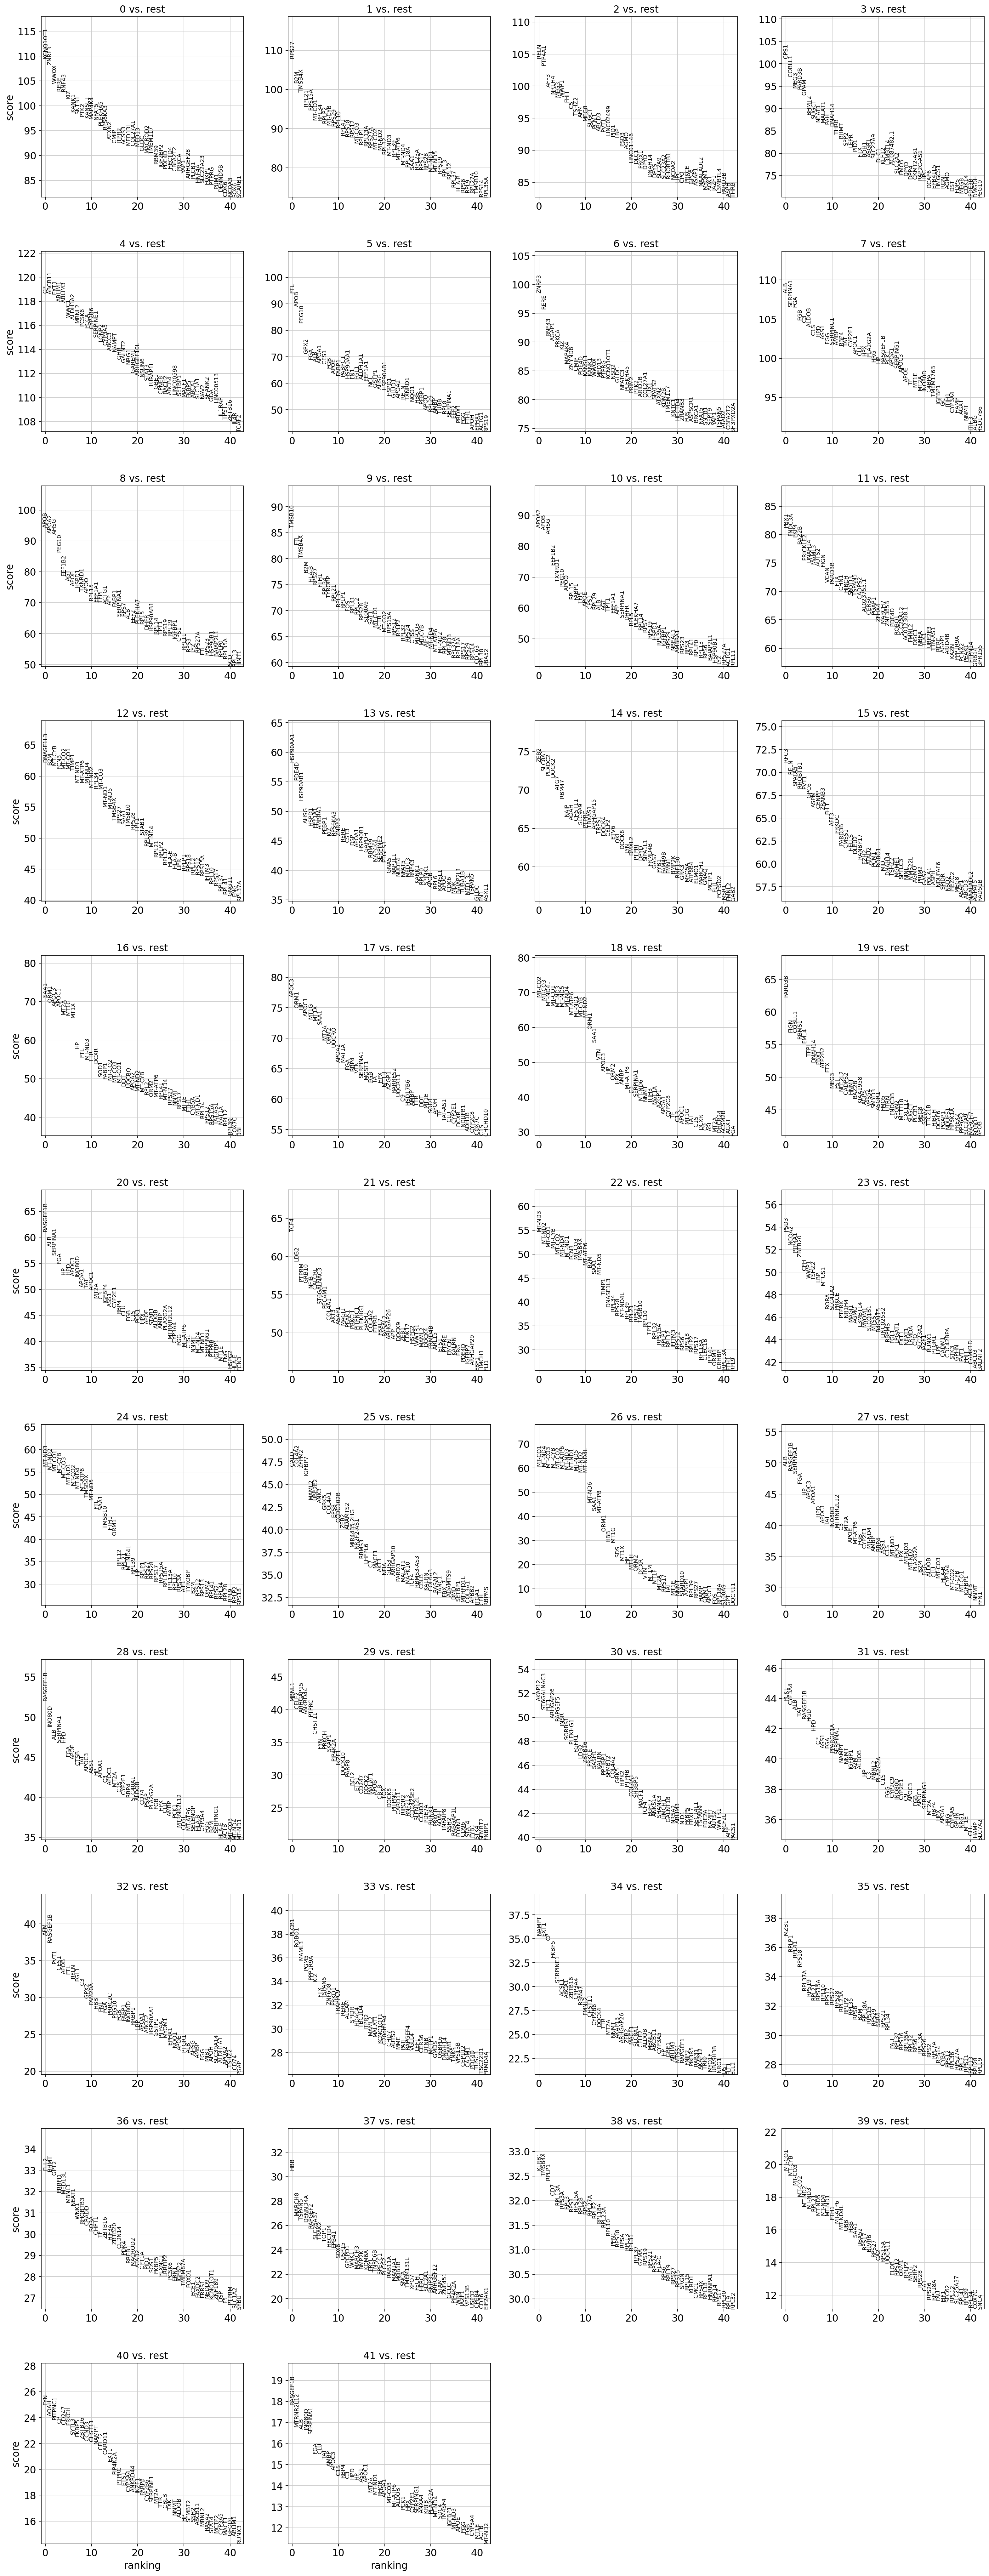

In [8]:
sc.pl.rank_genes_groups(adata, n_genes=41, sharey=False)

In [9]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 1.5)]
markers

/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scanpy/get/get.py:75: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


group     names      scores  logfoldchanges     pvals  pvals_adj
0          0  KCNQ1OT1  109.555702        3.860460  0.000000   0.000000
1          0     ZNRF3  108.267235        3.718758  0.000000   0.000000
2          0      WWOX  104.468971        3.324889  0.000000   0.000000
3          0      RERE  102.944473        3.143061  0.000000   0.000000
4          0     RNF43  102.896667        3.718291  0.000000   0.000000
...      ...       ...         ...             ...       ...        ...
482591    41     HMGA1    2.546494        1.940438  0.010881   0.044718
482593    41      FLNA    2.540390        1.962265  0.011073   0.045332
482597    41      DPP7    2.510763        1.969727  0.012047   0.048560
482598    41    ALKAL2    2.504111        5.504755  0.012276   0.049313
482599    41     FLOT2    2.499846        1.577796  0.012425   0.049826

[27123 rows x 6 columns]

In [10]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...:   0%|          | 0/42 [00:00<?, ?it/s]

/opt/tljh/user/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


DE...: 100%|██████████| 42/42 [53:46<00:00, 76.83s/it]  


proba_de  proba_not_de  bayes_factor    scale1    scale2  \
ADCY6     0.9846        0.0154      4.157867  0.000134  0.000024   
ACSM3     0.9838        0.0162      4.106411  0.000663  0.000101   
BIK       0.9830        0.0170      4.057395  0.000037  0.000006   
FGB       0.9826        0.0174      4.033731  0.000138  0.003069   
USP30     0.9820        0.0180      3.999219  0.000114  0.000025   
...          ...           ...           ...       ...       ...   
AMFR      0.5610        0.4390      0.245221  0.000065  0.000065   
MCCC2     0.5602        0.4398      0.241974  0.000087  0.000071   
YIPF6     0.5496        0.4504      0.199055  0.000046  0.000038   
CAPZA1    0.5478        0.4522      0.191786  0.000109  0.000112   
TXNL1     0.5442        0.4558      0.177263  0.000061  0.000058   

        pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  raw_mean1  \
ADCY6            0.0   0.25  3.611479    3.240687  2.276811  ...   0.595145   
ACSM3            0.0   0.25  3.773892    3.785646  1.990871  ...   3.272468   
BIK              0.0   0.25  3.374774    3.432714  1.602625  ...   0.137124   
FGB              0.0   0.25 -3.903417   -4.192836  1.990471  ...   0.311744   
USP30            0.0   0.25  2.770190    2.524670  1.542632  ...   0.448713   
...              ...    ...       ...         ...       ...  ...        ...   
AMFR             0.0   0.25  0.063221    0.012228  0.609515  ...   0.097222   
MCCC2            0.0   0.25  0.461890    0.186690  0.854115  ...   0.090278   
YIPF6            0.0   0.25  0.421664    0.181008  0.824570  ...   0.090278   
CAPZA1           0.0   0.25  0.120087    0.023236  0.781822  ...   0.111111   
TXNL1            0.0   0.25  0.164670    0.027582  0.686373  ...   0.111111   

        raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
ADCY6    0.116278               0.409668               0.088280   
ACSM3    0.353298               0.648280               0.139137   
BIK      0.017150               0.107995               0.014549   
FGB     11.055393               0.146111               0.802332   
USP30    0.093361               0.332352               0.076599   
...           ...                    ...                    ...   
AMFR     0.223635               0.083333               0.173237   
MCCC2    0.280820               0.090278               0.204016   
YIPF6    0.168062               0.076389               0.141171   
CAPZA1   0.413355               0.111111               0.281823   
TXNL1    0.208024               0.097222               0.166302   

        raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
ADCY6               1.375586              0.235485            True   
ACSM3               6.988878              0.916261            True   
BIK                 0.305893              0.042851            True   
FGB                 0.638603             31.988697            True   
USP30               0.968535              0.195098            True   
...                      ...                   ...             ...   
AMFR                0.657635              0.550040           False   
MCCC2               0.522364              0.644903           False   
YIPF6               0.473215              0.420590           False   
CAPZA1              0.661161              1.113127           False   
TXNL1               0.920956              0.535778           False   

        comparison  group1 group2  
ADCY6    0 vs Rest       0   Rest  
ACSM3    0 vs Rest       0   Rest  
BIK      0 vs Rest       0   Rest  
FGB      0 vs Rest       0   Rest  
USP30    0 vs Rest       0   Rest  
...            ...     ...    ...  
AMFR    41 vs Rest      41   Rest  
MCCC2   41 vs Rest      41   Rest  
YIPF6   41 vs Rest      41   Rest  
CAPZA1  41 vs Rest      41   Rest  
TXNL1   41 vs Rest      41   Rest  

[494004 rows x 22 columns]

In [11]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > 1.5)]
markers_scvi

proba_de  proba_not_de  bayes_factor    scale1    scale2  \
ADCY6     0.9846        0.0154      4.157867  0.000134  0.000024   
ACSM3     0.9838        0.0162      4.106411  0.000663  0.000101   
BIK       0.9830        0.0170      4.057395  0.000037  0.000006   
USP30     0.9820        0.0180      3.999219  0.000114  0.000025   
PTPRH     0.9816        0.0184      3.976833  0.000079  0.000016   
...          ...           ...           ...       ...       ...   
IER5      0.9258        0.0742      2.523894  0.000053  0.000027   
MT-ND5    0.9256        0.0744      2.520986  0.002454  0.002193   
RND3      0.9256        0.0744      2.520986  0.000184  0.000079   
APOA4     0.9254        0.0746      2.518085  0.000222  0.000140   
TANC2     0.9254        0.0746      2.518085  0.000045  0.000032   

        pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  raw_mean1  \
ADCY6            0.0   0.25  3.611479    3.240687  2.276811  ...   0.595145   
ACSM3            0.0   0.25  3.773892    3.785646  1.990871  ...   3.272468   
BIK              0.0   0.25  3.374774    3.432714  1.602625  ...   0.137124   
USP30            0.0   0.25  2.770190    2.524670  1.542632  ...   0.448713   
PTPRH            0.0   0.25  3.377112    2.638707  2.467296  ...   0.318251   
...              ...    ...       ...         ...       ...  ...        ...   
IER5             0.0   0.25  1.727964    1.690828  1.738613  ...   0.062500   
MT-ND5           0.0   0.25  1.993612    2.698101  2.350904  ...   2.736110   
RND3             0.0   0.25  1.768796    1.924160  1.356866  ...   0.152778   
APOA4            0.0   0.25  1.746604    1.757664  1.777025  ...   0.138889   
TANC2            0.0   0.25  1.504151    1.393274  2.048413  ...   0.083333   

        raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
ADCY6    0.116278               0.409668               0.088280   
ACSM3    0.353298               0.648280               0.139137   
BIK      0.017150               0.107995               0.014549   
USP30    0.093361               0.332352               0.076599   
PTPRH    0.065825               0.247289               0.057185   
...           ...                    ...                    ...   
IER5     0.059847               0.055556               0.049387   
MT-ND5   4.042990               0.875000               0.634961   
RND3     0.287615               0.145833               0.154737   
APOA4    0.177399               0.138889               0.106617   
TANC2    0.108053               0.076389               0.069098   

        raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
ADCY6               1.375586              0.235485            True   
ACSM3               6.988878              0.916261            True   
BIK                 0.305893              0.042851            True   
USP30               0.968535              0.195098            True   
PTPRH               0.707170              0.138429            True   
...                      ...                   ...             ...   
IER5                0.434285              0.247357            True   
MT-ND5             18.591995             20.954376            True   
RND3                0.925804              0.674377            True   
APOA4               0.956599              0.480245            True   
TANC2               0.465075              0.295537            True   

        comparison  group1 group2  
ADCY6    0 vs Rest       0   Rest  
ACSM3    0 vs Rest       0   Rest  
BIK      0 vs Rest       0   Rest  
USP30    0 vs Rest       0   Rest  
PTPRH    0 vs Rest       0   Rest  
...            ...     ...    ...  
IER5    41 vs Rest      41   Rest  
MT-ND5  41 vs Rest      41   Rest  
RND3    41 vs Rest      41   Rest  
APOA4   41 vs Rest      41   Rest  
TANC2   41 vs Rest      41   Rest  

[30077 rows x 22 columns]

/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:401: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


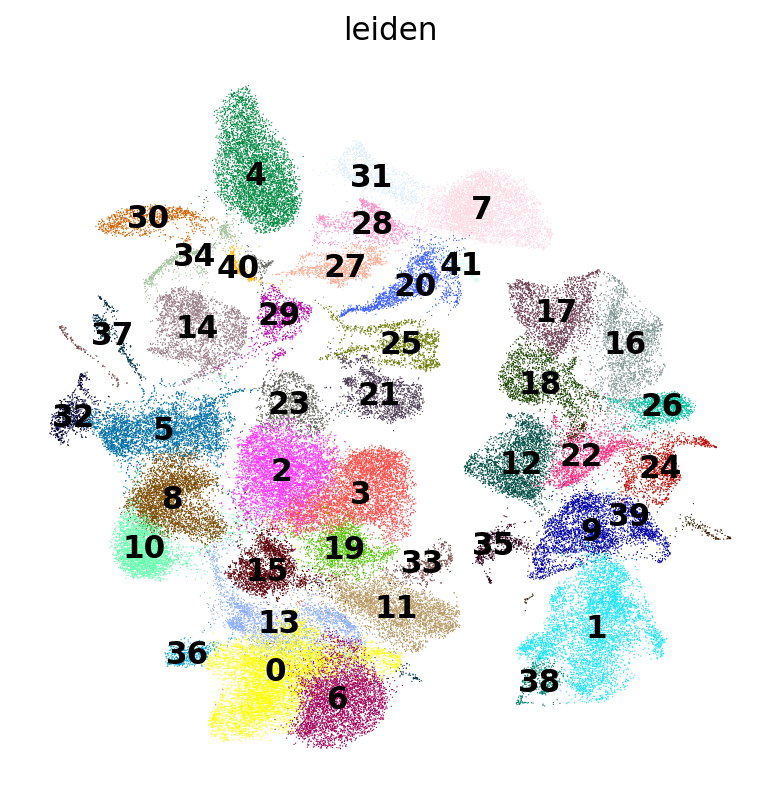

In [12]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

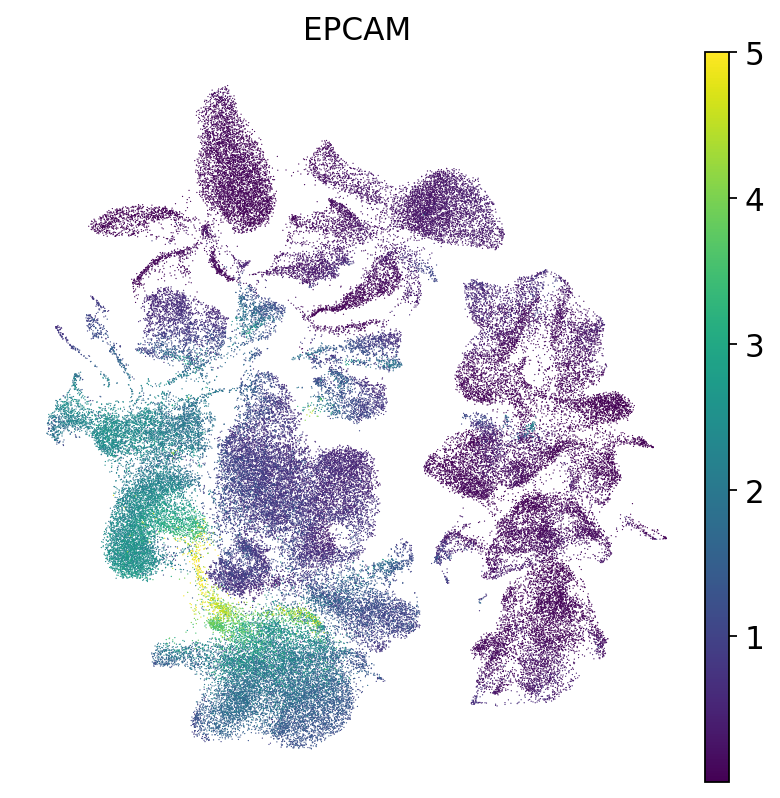

In [13]:
sc.pl.umap(adata, color = ['EPCAM'], frameon = False, layer = 'scvi_normalized', vmax = 5)


In [14]:
adata.write_h5ad('/datos/home/jupyter-mdiaz/scRNAseq_pipeline/adata_saved/P4_markers.h5ad')

In [15]:
adata

AnnData object with n_obs × n_vars = 92578 × 11762
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap', 'rank_genes_groups'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

# Finding cell markers using log fold change (lfc) values 


As mention before, in this study, manual cell annotation was employed to label the cells, guided by the analysis of log fold changes to identify genes highly expressed within each cluster. To ensure the accurate identification of each cell type within clusters, a systematic approach was adopted. Multiple log fold change thresholds (2.0, 2.5, 3.5, 4.0, 5.0, 6.5, 7.5) were sequentially applied, allowing for a comprehensive assessment of gene expression patterns. 

This iterative process accommodated variations in gene expression levels across clusters, ensuring that the most informative and discriminatory genes were considered for cell type assignment. By gradually increasing the log fold change threshold, from lower to higher values, the annotation process captured subtle differences in gene expression and delineate distinct cellular populations with better precision. This approach facilitated the robust identification of cell types and enhanced the biological relevance of the annotation results.

**Note:** markers for liver and immune cells were downloaded from the Panglao Database (https://panglaodb.se/)

In [ ]:
adata = sc.read_h5ad('/datos/home/jupyter-mdiaz/scRNAseq_pipeline/adata_saved/P4_markers.h5ad')

In [16]:
markers.to_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/markers.csv", index=False)

# lfc >= 2.0

In [17]:
%cd '/datos/home/jupyter-mdiaz/scRNAseq_pipeline/adata_saved/'

/datos/home/jupyter-mdiaz/scRNAseq_pipeline/adata_saved


In [18]:
markers = pd.read_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/markers.csv")
markers_vlow_filtrado = markers.loc[markers['logfoldchanges'] >= 2.0]
print(markers_vlow_filtrado)

       group     names      scores  logfoldchanges     pvals  pvals_adj
0          0  KCNQ1OT1  109.555700        3.860460  0.000000   0.000000
1          0     ZNRF3  108.267235        3.718758  0.000000   0.000000
2          0      WWOX  104.468970        3.324889  0.000000   0.000000
3          0      RERE  102.944470        3.143061  0.000000   0.000000
4          0     RNF43  102.896670        3.718291  0.000000   0.000000
...      ...       ...         ...             ...       ...        ...
27114     41      IRF6    2.581326        3.998868  0.009842   0.041153
27115     41    TUBA1A    2.575175        2.480700  0.010019   0.041729
27116     41      TSPO    2.571232        2.023712  0.010134   0.042088
27117     41   IRF2BPL    2.549053        2.408315  0.010802   0.044454
27121     41    ALKAL2    2.504111        5.504755  0.012276   0.049313

[13623 rows x 6 columns]


In [19]:
markers0 = markers_vlow_filtrado
print(markers0)

       group     names      scores  logfoldchanges     pvals  pvals_adj
0          0  KCNQ1OT1  109.555700        3.860460  0.000000   0.000000
1          0     ZNRF3  108.267235        3.718758  0.000000   0.000000
2          0      WWOX  104.468970        3.324889  0.000000   0.000000
3          0      RERE  102.944470        3.143061  0.000000   0.000000
4          0     RNF43  102.896670        3.718291  0.000000   0.000000
...      ...       ...         ...             ...       ...        ...
27114     41      IRF6    2.581326        3.998868  0.009842   0.041153
27115     41    TUBA1A    2.575175        2.480700  0.010019   0.041729
27116     41      TSPO    2.571232        2.023712  0.010134   0.042088
27117     41   IRF2BPL    2.549053        2.408315  0.010802   0.044454
27121     41    ALKAL2    2.504111        5.504755  0.012276   0.049313

[13623 rows x 6 columns]


In [22]:
normal_HCC_markers = pd.read_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/Repeated_markers_immune_liver_markers.csv")
print(normal_HCC_markers)

       names           cell.type          organ
0        CD2             B cells  Immune system
1        CD5             B cells  Immune system
2      MS4A1             B cells  Immune system
3        CR2             B cells  Immune system
4       CD22             B cells  Immune system
...      ...                 ...            ...
1924    IL10  T regulatory cells  Immune system
1925   IL1R1  T regulatory cells  Immune system
1926   ITGB8  T regulatory cells  Immune system
1927  LRRC32  T regulatory cells  Immune system
1928   FOLR1  T regulatory cells  Immune system

[1929 rows x 3 columns]


In [23]:
genes_comunes = markers0.merge(normal_HCC_markers, on="names")

In [24]:
nuevo_df = genes_comunes.merge(markers0, on="names")

In [25]:
nuevo_df = nuevo_df.loc[:,~nuevo_df.columns.duplicated()]

In [26]:
markers0 = nuevo_df
print(markers0)

       group_x  names   scores_x  logfoldchanges_x   pvals_x  pvals_adj_x  \
0            0  PRKCA  86.885050          2.642750  0.000000     0.000000   
1            0  PRKCA  86.885050          2.642750  0.000000     0.000000   
2            0  PRKCA  86.885050          2.642750  0.000000     0.000000   
3            0  PRKCA  86.885050          2.642750  0.000000     0.000000   
4            0  HNF4A  84.547420          2.782275  0.000000     0.000000   
...        ...    ...        ...               ...       ...          ...   
10811       41  KRT19   3.618722          2.436290  0.000296     0.002106   
10812       41  CLDN4   2.764884          3.768508  0.005694     0.025980   
10813       41  CLDN4   2.764884          3.768508  0.005694     0.025980   
10814       41  CLDN4   2.764884          3.768508  0.005694     0.025980   
10815       41  CLDN4   2.764884          3.768508  0.005694     0.025980   

                          cell.type          organ  group_y   scores_y  \
0

In [27]:
markers0_filt = markers0.loc[:, ['group_x', 'names', 'logfoldchanges_x', 'cell.type', 'organ']]
markers0_filt = markers0_filt.rename(columns={'group_x': 'group', 'logfoldchanges_x': 'logfoldchanges'})
print(markers0_filt)

       group  names  logfoldchanges                     cell.type  \
0          0  PRKCA        2.642750  Plasmacytoid dendritic cells   
1          0  PRKCA        2.642750  Plasmacytoid dendritic cells   
2          0  PRKCA        2.642750  Plasmacytoid dendritic cells   
3          0  PRKCA        2.642750  Plasmacytoid dendritic cells   
4          0  HNF4A        2.782275                  Hepatoblasts   
...      ...    ...             ...                           ...   
10811     41  KRT19        2.436290                Cholangiocytes   
10812     41  CLDN4        3.768508                Cholangiocytes   
10813     41  CLDN4        3.768508                Cholangiocytes   
10814     41  CLDN4        3.768508                Cholangiocytes   
10815     41  CLDN4        3.768508                Cholangiocytes   

               organ  
0      Immune system  
1      Immune system  
2      Immune system  
3      Immune system  
4              Liver  
...              ...  
10811     

In [90]:
markers0_filt.to_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/2_0_lfc_markers.csv", index=False)

# lfc >= 2.5

In [29]:
markers_min_filtrado = markers.loc[markers['logfoldchanges'] >= 2.5]
print(markers_min_filtrado)

       group     names      scores  logfoldchanges     pvals  pvals_adj
0          0  KCNQ1OT1  109.555700        3.860460  0.000000   0.000000
1          0     ZNRF3  108.267235        3.718758  0.000000   0.000000
2          0      WWOX  104.468970        3.324889  0.000000   0.000000
3          0      RERE  102.944470        3.143061  0.000000   0.000000
4          0     RNF43  102.896670        3.718291  0.000000   0.000000
...      ...       ...         ...             ...       ...        ...
27105     41     PLPP2    2.778324        5.394652  0.005464   0.025056
27106     41     CLDN4    2.764884        3.768508  0.005694   0.025980
27112     41     SPNS2    2.671600        3.794631  0.007549   0.032825
27114     41      IRF6    2.581326        3.998868  0.009842   0.041153
27121     41    ALKAL2    2.504111        5.504755  0.012276   0.049313

[7427 rows x 6 columns]


In [30]:
markers1 = markers_min_filtrado
print(markers1)

       group     names      scores  logfoldchanges     pvals  pvals_adj
0          0  KCNQ1OT1  109.555700        3.860460  0.000000   0.000000
1          0     ZNRF3  108.267235        3.718758  0.000000   0.000000
2          0      WWOX  104.468970        3.324889  0.000000   0.000000
3          0      RERE  102.944470        3.143061  0.000000   0.000000
4          0     RNF43  102.896670        3.718291  0.000000   0.000000
...      ...       ...         ...             ...       ...        ...
27105     41     PLPP2    2.778324        5.394652  0.005464   0.025056
27106     41     CLDN4    2.764884        3.768508  0.005694   0.025980
27112     41     SPNS2    2.671600        3.794631  0.007549   0.032825
27114     41      IRF6    2.581326        3.998868  0.009842   0.041153
27121     41    ALKAL2    2.504111        5.504755  0.012276   0.049313

[7427 rows x 6 columns]


In [31]:
normal_HCC_markers = pd.read_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/Repeated_markers_immune_liver_markers.csv")
print(normal_HCC_markers)

       names           cell.type          organ
0        CD2             B cells  Immune system
1        CD5             B cells  Immune system
2      MS4A1             B cells  Immune system
3        CR2             B cells  Immune system
4       CD22             B cells  Immune system
...      ...                 ...            ...
1924    IL10  T regulatory cells  Immune system
1925   IL1R1  T regulatory cells  Immune system
1926   ITGB8  T regulatory cells  Immune system
1927  LRRC32  T regulatory cells  Immune system
1928   FOLR1  T regulatory cells  Immune system

[1929 rows x 3 columns]


In [32]:
genes_comunes = markers1.merge(normal_HCC_markers, on="names")

In [33]:
nuevo_df = genes_comunes.merge(markers1, on="names")

In [34]:
nuevo_df = nuevo_df.loc[:,~nuevo_df.columns.duplicated()]

In [35]:
markers2 = nuevo_df
print(markers2)

      group_x   names   scores_x  logfoldchanges_x   pvals_x  pvals_adj_x  \
0           0   PRKCA  86.885050          2.642750  0.000000     0.000000   
1           0   PRKCA  86.885050          2.642750  0.000000     0.000000   
2           0   PRKCA  86.885050          2.642750  0.000000     0.000000   
3           0   HNF4A  84.547420          2.782275  0.000000     0.000000   
4           0   HNF4A  84.547420          2.782275  0.000000     0.000000   
...       ...     ...        ...               ...       ...          ...   
5962       41  CSRNP1   3.630015          2.623811  0.000283     0.002033   
5963       41  CSRNP1   3.630015          2.623811  0.000283     0.002033   
5964       41   CLDN4   2.764884          3.768508  0.005694     0.025980   
5965       41   CLDN4   2.764884          3.768508  0.005694     0.025980   
5966       41   CLDN4   2.764884          3.768508  0.005694     0.025980   

                         cell.type          organ  group_y   scores_y  \
0 

In [36]:
markers2_filt = markers2.loc[:, ['group_x', 'names', 'logfoldchanges_x', 'cell.type', 'organ']]
markers2_filt = markers2_filt.rename(columns={'group_x': 'group', 'logfoldchanges_x': 'logfoldchanges'})
print(markers2_filt)

      group   names  logfoldchanges                     cell.type  \
0         0   PRKCA        2.642750  Plasmacytoid dendritic cells   
1         0   PRKCA        2.642750  Plasmacytoid dendritic cells   
2         0   PRKCA        2.642750  Plasmacytoid dendritic cells   
3         0   HNF4A        2.782275                  Hepatoblasts   
4         0   HNF4A        2.782275                   Hepatocytes   
...     ...     ...             ...                           ...   
5962     41  CSRNP1        2.623811                    Mast cells   
5963     41  CSRNP1        2.623811                    Mast cells   
5964     41   CLDN4        3.768508                Cholangiocytes   
5965     41   CLDN4        3.768508                Cholangiocytes   
5966     41   CLDN4        3.768508                Cholangiocytes   

              organ  
0     Immune system  
1     Immune system  
2     Immune system  
3             Liver  
4             Liver  
...             ...  
5962  Immune syst

In [91]:
markers2_filt.to_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/2_5_lfc_markers.csv", index=False)

# lfc >= 3.5

In [38]:
markers_med_filtrado = markers.loc[markers['logfoldchanges'] >= 3.5]
print(markers_med_filtrado)

       group     names      scores  logfoldchanges     pvals  pvals_adj
0          0  KCNQ1OT1  109.555700        3.860460  0.000000   0.000000
1          0     ZNRF3  108.267235        3.718758  0.000000   0.000000
4          0     RNF43  102.896670        3.718291  0.000000   0.000000
5          0       KIZ  101.414290        3.605338  0.000000   0.000000
1557       1     RPS27  107.947230        5.306079  0.000000   0.000000
...      ...       ...         ...             ...       ...        ...
27105     41     PLPP2    2.778324        5.394652  0.005464   0.025056
27106     41     CLDN4    2.764884        3.768508  0.005694   0.025980
27112     41     SPNS2    2.671600        3.794631  0.007549   0.032825
27114     41      IRF6    2.581326        3.998868  0.009842   0.041153
27121     41    ALKAL2    2.504111        5.504755  0.012276   0.049313

[2341 rows x 6 columns]


In [39]:
markers3 = markers_med_filtrado
print(markers3)

       group     names      scores  logfoldchanges     pvals  pvals_adj
0          0  KCNQ1OT1  109.555700        3.860460  0.000000   0.000000
1          0     ZNRF3  108.267235        3.718758  0.000000   0.000000
4          0     RNF43  102.896670        3.718291  0.000000   0.000000
5          0       KIZ  101.414290        3.605338  0.000000   0.000000
1557       1     RPS27  107.947230        5.306079  0.000000   0.000000
...      ...       ...         ...             ...       ...        ...
27105     41     PLPP2    2.778324        5.394652  0.005464   0.025056
27106     41     CLDN4    2.764884        3.768508  0.005694   0.025980
27112     41     SPNS2    2.671600        3.794631  0.007549   0.032825
27114     41      IRF6    2.581326        3.998868  0.009842   0.041153
27121     41    ALKAL2    2.504111        5.504755  0.012276   0.049313

[2341 rows x 6 columns]


In [40]:
rep_normal_HCC_markers = pd.read_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/Repeated_markers_immune_liver_markers.csv")
print(rep_normal_HCC_markers)

       names           cell.type          organ
0        CD2             B cells  Immune system
1        CD5             B cells  Immune system
2      MS4A1             B cells  Immune system
3        CR2             B cells  Immune system
4       CD22             B cells  Immune system
...      ...                 ...            ...
1924    IL10  T regulatory cells  Immune system
1925   IL1R1  T regulatory cells  Immune system
1926   ITGB8  T regulatory cells  Immune system
1927  LRRC32  T regulatory cells  Immune system
1928   FOLR1  T regulatory cells  Immune system

[1929 rows x 3 columns]


In [41]:
genes_comunes = markers3.merge(rep_normal_HCC_markers, on="names")

In [42]:
nuevo_df = genes_comunes.merge(markers3, on="names")

In [43]:
nuevo_df = nuevo_df.loc[:,~nuevo_df.columns.duplicated()]

In [44]:
markers4 = nuevo_df

In [45]:
print(markers4)

      group_x   names   scores_x  logfoldchanges_x   pvals_x  pvals_adj_x  \
0           1   HLA-B  74.058900          3.637263  0.000000     0.000000   
1           1   HLA-B  74.058900          3.637263  0.000000     0.000000   
2           1   HLA-B  74.058900          3.637263  0.000000     0.000000   
3           1   HLA-B  74.058900          3.637263  0.000000     0.000000   
4           1    CCL5  62.504875          6.727941  0.000000     0.000000   
...       ...     ...        ...               ...       ...          ...   
1710       41   BIRC3   4.140042          3.611483  0.000035     0.000333   
1711       41   BIRC3   4.140042          3.611483  0.000035     0.000333   
1712       41  LGALS4   3.797591          4.820415  0.000146     0.001155   
1713       41  LGALS4   3.797591          4.820415  0.000146     0.001155   
1714       41   CLDN4   2.764884          3.768508  0.005694     0.025980   

            cell.type          organ  group_y   scores_y  logfoldchanges_y 

In [46]:
markers4_filt = markers4.loc[:, ['group_x', 'names', 'logfoldchanges_x', 'cell.type', 'organ']]
markers4_filt = markers4_filt.rename(columns={'group_x': 'group', 'logfoldchanges_x': 'logfoldchanges'})
print(markers4_filt)

      group   names  logfoldchanges        cell.type          organ
0         1   HLA-B        3.637263  Dendritic cells  Immune system
1         1   HLA-B        3.637263  Dendritic cells  Immune system
2         1   HLA-B        3.637263  Dendritic cells  Immune system
3         1   HLA-B        3.637263  Dendritic cells  Immune system
4         1    CCL5        6.727941      Eosinophils  Immune system
...     ...     ...             ...              ...            ...
1710     41   BIRC3        3.611483          B cells  Immune system
1711     41   BIRC3        3.611483    B cells naive  Immune system
1712     41  LGALS4        4.820415   Cholangiocytes          Liver
1713     41  LGALS4        4.820415   Cholangiocytes          Liver
1714     41   CLDN4        3.768508   Cholangiocytes          Liver

[1715 rows x 5 columns]


In [106]:
markers4_filt.to_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/3_5_lfc_markers.csv", index=False)

# lfc >= 4.0

In [93]:
markers_max_filtrado = markers.loc[markers['logfoldchanges'] >= 4.0]
print(markers_max_filtrado)

       group   names      scores  logfoldchanges     pvals  pvals_adj
1557       1   RPS27  107.947230        5.306079  0.000000   0.000000
1559       1  TMSB4X   99.288080        4.561518  0.000000   0.000000
1560       1   RPL21   95.623300        4.772984  0.000000   0.000000
1561       1  RPS15A   94.731070        4.624244  0.000000   0.000000
1565       1  MT-CYB   90.860690        4.102719  0.000000   0.000000
...      ...     ...         ...             ...       ...        ...
27064     41  SLC5A1    3.552495        6.921551  0.000382   0.002626
27083     41    SCD5    3.257939        4.012503  0.001122   0.006597
27100     41   MACC1    2.859216        4.920100  0.004247   0.020256
27105     41   PLPP2    2.778324        5.394652  0.005464   0.025056
27121     41  ALKAL2    2.504111        5.504755  0.012276   0.049313

[1312 rows x 6 columns]


In [94]:
markers5 = markers_max_filtrado
print(markers5)

       group   names      scores  logfoldchanges     pvals  pvals_adj
1557       1   RPS27  107.947230        5.306079  0.000000   0.000000
1559       1  TMSB4X   99.288080        4.561518  0.000000   0.000000
1560       1   RPL21   95.623300        4.772984  0.000000   0.000000
1561       1  RPS15A   94.731070        4.624244  0.000000   0.000000
1565       1  MT-CYB   90.860690        4.102719  0.000000   0.000000
...      ...     ...         ...             ...       ...        ...
27064     41  SLC5A1    3.552495        6.921551  0.000382   0.002626
27083     41    SCD5    3.257939        4.012503  0.001122   0.006597
27100     41   MACC1    2.859216        4.920100  0.004247   0.020256
27105     41   PLPP2    2.778324        5.394652  0.005464   0.025056
27121     41  ALKAL2    2.504111        5.504755  0.012276   0.049313

[1312 rows x 6 columns]


In [95]:
rep_normal_HCC_markers = pd.read_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/Repeated_markers_immune_liver_markers.csv")
print(rep_normal_HCC_markers)


       names           cell.type          organ
0        CD2             B cells  Immune system
1        CD5             B cells  Immune system
2      MS4A1             B cells  Immune system
3        CR2             B cells  Immune system
4       CD22             B cells  Immune system
...      ...                 ...            ...
1924    IL10  T regulatory cells  Immune system
1925   IL1R1  T regulatory cells  Immune system
1926   ITGB8  T regulatory cells  Immune system
1927  LRRC32  T regulatory cells  Immune system
1928   FOLR1  T regulatory cells  Immune system

[1929 rows x 3 columns]


In [96]:
genes_comunes = markers5.merge(rep_normal_HCC_markers, on="names")

In [97]:
nuevo_df = genes_comunes.merge(markers5, on="names")

In [98]:
nuevo_df = nuevo_df.loc[:,~nuevo_df.columns.duplicated()]

In [99]:
markers6 = nuevo_df

In [100]:
markers6_filt = markers6.loc[:, ['group_x', 'names', 'logfoldchanges_x', 'cell.type', 'organ']]
markers6_filt = markers6_filt.rename(columns={'group_x': 'group', 'logfoldchanges_x': 'logfoldchanges'})
print(markers6_filt)

     group   names  logfoldchanges            cell.type          organ
0        1    CCL5        6.727941          Eosinophils  Immune system
1        1    CCL5        6.727941          Eosinophils  Immune system
2        1    CCL5        6.727941  Gamma delta T cells  Immune system
3        1    CCL5        6.727941  Gamma delta T cells  Immune system
4        1    CCL5        6.727941          Macrophages  Immune system
..     ...     ...             ...                  ...            ...
944     41     TAT        4.368266          Hepatocytes          Liver
945     41   FXYD2        6.346839       Cholangiocytes          Liver
946     41   FXYD2        6.346839       Cholangiocytes          Liver
947     41  LGALS4        4.820415       Cholangiocytes          Liver
948     41  LGALS4        4.820415       Cholangiocytes          Liver

[949 rows x 5 columns]


In [101]:
markers6_filt.to_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/4_0_lfc_markers.csv", index=False)

# lfc >= 5.0

In [56]:
markers_ult_filtrado = markers.loc[markers['logfoldchanges'] >= 5.0]
print(markers_ult_filtrado)

       group   names      scores  logfoldchanges          pvals      pvals_adj
1557       1   RPS27  107.947230        5.306079   0.000000e+00   0.000000e+00
1621       1    CCL5   62.504875        6.727941   0.000000e+00   0.000000e+00
1638       1   KLRB1   47.183613        5.634414   0.000000e+00   0.000000e+00
1648       1    GZMA   42.472538        5.941558   0.000000e+00   0.000000e+00
1660       1    CST7   36.763496        5.665859  7.076550e-296  8.018726e-295
...      ...     ...         ...             ...            ...            ...
27010     41  SPINT1    5.248396        5.301766   1.534293e-07   3.100748e-06
27032     41   FXYD2    4.388089        6.346839   1.143511e-05   1.283395e-04
27064     41  SLC5A1    3.552495        6.921551   3.815962e-04   2.626293e-03
27105     41   PLPP2    2.778324        5.394652   5.464009e-03   2.505562e-02
27121     41  ALKAL2    2.504111        5.504755   1.227594e-02   4.931340e-02

[397 rows x 6 columns]


In [57]:
markers7 = markers_ult_filtrado
print(markers7)

       group   names      scores  logfoldchanges          pvals      pvals_adj
1557       1   RPS27  107.947230        5.306079   0.000000e+00   0.000000e+00
1621       1    CCL5   62.504875        6.727941   0.000000e+00   0.000000e+00
1638       1   KLRB1   47.183613        5.634414   0.000000e+00   0.000000e+00
1648       1    GZMA   42.472538        5.941558   0.000000e+00   0.000000e+00
1660       1    CST7   36.763496        5.665859  7.076550e-296  8.018726e-295
...      ...     ...         ...             ...            ...            ...
27010     41  SPINT1    5.248396        5.301766   1.534293e-07   3.100748e-06
27032     41   FXYD2    4.388089        6.346839   1.143511e-05   1.283395e-04
27064     41  SLC5A1    3.552495        6.921551   3.815962e-04   2.626293e-03
27105     41   PLPP2    2.778324        5.394652   5.464009e-03   2.505562e-02
27121     41  ALKAL2    2.504111        5.504755   1.227594e-02   4.931340e-02

[397 rows x 6 columns]


In [58]:
rep_normal_HCC_markers = pd.read_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/Repeated_markers_immune_liver_markers.csv")
print(rep_normal_HCC_markers)

       names           cell.type          organ
0        CD2             B cells  Immune system
1        CD5             B cells  Immune system
2      MS4A1             B cells  Immune system
3        CR2             B cells  Immune system
4       CD22             B cells  Immune system
...      ...                 ...            ...
1924    IL10  T regulatory cells  Immune system
1925   IL1R1  T regulatory cells  Immune system
1926   ITGB8  T regulatory cells  Immune system
1927  LRRC32  T regulatory cells  Immune system
1928   FOLR1  T regulatory cells  Immune system

[1929 rows x 3 columns]


In [59]:
genes_comunes = markers7.merge(rep_normal_HCC_markers, on="names")

In [60]:
nuevo_df = genes_comunes.merge(markers7, on="names")

In [61]:
nuevo_df = nuevo_df.loc[:,~nuevo_df.columns.duplicated()]

In [62]:
markers8 = nuevo_df
print(markers8)

     group_x  names   scores_x  logfoldchanges_x       pvals_x   pvals_adj_x  \
0          1   CCL5  62.504875          6.727941  0.000000e+00  0.000000e+00   
1          1   CCL5  62.504875          6.727941  0.000000e+00  0.000000e+00   
2          1   CCL5  62.504875          6.727941  0.000000e+00  0.000000e+00   
3          1   CCL5  62.504875          6.727941  0.000000e+00  0.000000e+00   
4          1   CCL5  62.504875          6.727941  0.000000e+00  0.000000e+00   
..       ...    ...        ...               ...           ...           ...   
319       40    ITK   7.784977          5.196689  6.972552e-15  2.240742e-13   
320       40   NCR1   6.117915          5.680399  9.480777e-10  1.858548e-08   
321       40   NCR1   6.117915          5.680399  9.480777e-10  1.858548e-08   
322       41  FXYD2   4.388089          6.346839  1.143511e-05  1.283395e-04   
323       41  FXYD2   4.388089          6.346839  1.143511e-05  1.283395e-04   

               cell.type          organ

In [63]:
markers8_filt = markers8.loc[:, ['group_x', 'names', 'logfoldchanges_x', 'cell.type', 'organ']]
markers8_filt = markers8_filt.rename(columns={'group_x': 'group', 'logfoldchanges_x': 'logfoldchanges'})
print(markers8_filt)

     group  names  logfoldchanges            cell.type          organ
0        1   CCL5        6.727941          Eosinophils  Immune system
1        1   CCL5        6.727941          Eosinophils  Immune system
2        1   CCL5        6.727941  Gamma delta T cells  Immune system
3        1   CCL5        6.727941  Gamma delta T cells  Immune system
4        1   CCL5        6.727941          Macrophages  Immune system
..     ...    ...             ...                  ...            ...
319     40    ITK        5.196689              T cells  Immune system
320     40   NCR1        5.680399             NK cells  Immune system
321     40   NCR1        5.680399             NK cells  Immune system
322     41  FXYD2        6.346839       Cholangiocytes          Liver
323     41  FXYD2        6.346839       Cholangiocytes          Liver

[324 rows x 5 columns]


In [107]:
markers8_filt.to_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/5_0_lfc_markers.csv", index=False)

# lfc >= 6.5

In [65]:
markers_super_filtrado = markers.loc[markers['logfoldchanges'] >= 6.5]
print(markers_super_filtrado)

       group       names      scores  logfoldchanges          pvals  \
1621       1        CCL5   62.504875        6.727941   0.000000e+00   
3654       4    SERPINE1  115.009130        6.599401   0.000000e+00   
3786       4        DTX1   94.768800        6.842504   0.000000e+00   
9023       9     S100A12   21.738910        6.970006  8.796216e-105   
14458     17        SAA1   72.258286        6.576698   0.000000e+00   
16404     21      CALCRL   55.732483        6.562861   0.000000e+00   
16439     21        EBF1   45.105930        6.629557   0.000000e+00   
18441     25      COL6A3   33.292606        6.877613  4.939674e-243   
18475     25      SYNPO2   28.790052        7.054415  2.857313e-182   
18559     25      PLA2G5   20.272724        6.914814   2.239135e-91   
18625     25  BX322234.1   15.757017        6.728928   6.146640e-56   
20052     30      AKAP12   51.362020        7.586737   0.000000e+00   
20053     30  ST6GALNAC3   50.652245        7.594184   0.000000e+00   
20054 

In [66]:
markers9 = markers_super_filtrado
print(markers9)

       group       names      scores  logfoldchanges          pvals  \
1621       1        CCL5   62.504875        6.727941   0.000000e+00   
3654       4    SERPINE1  115.009130        6.599401   0.000000e+00   
3786       4        DTX1   94.768800        6.842504   0.000000e+00   
9023       9     S100A12   21.738910        6.970006  8.796216e-105   
14458     17        SAA1   72.258286        6.576698   0.000000e+00   
16404     21      CALCRL   55.732483        6.562861   0.000000e+00   
16439     21        EBF1   45.105930        6.629557   0.000000e+00   
18441     25      COL6A3   33.292606        6.877613  4.939674e-243   
18475     25      SYNPO2   28.790052        7.054415  2.857313e-182   
18559     25      PLA2G5   20.272724        6.914814   2.239135e-91   
18625     25  BX322234.1   15.757017        6.728928   6.146640e-56   
20052     30      AKAP12   51.362020        7.586737   0.000000e+00   
20053     30  ST6GALNAC3   50.652245        7.594184   0.000000e+00   
20054 

In [67]:
rep_normal_HCC_markers = pd.read_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/Repeated_markers_immune_liver_markers.csv")
print(rep_normal_HCC_markers)

       names           cell.type          organ
0        CD2             B cells  Immune system
1        CD5             B cells  Immune system
2      MS4A1             B cells  Immune system
3        CR2             B cells  Immune system
4       CD22             B cells  Immune system
...      ...                 ...            ...
1924    IL10  T regulatory cells  Immune system
1925   IL1R1  T regulatory cells  Immune system
1926   ITGB8  T regulatory cells  Immune system
1927  LRRC32  T regulatory cells  Immune system
1928   FOLR1  T regulatory cells  Immune system

[1929 rows x 3 columns]


In [68]:
genes_comunes = markers9.merge(rep_normal_HCC_markers, on="names")

In [69]:
nuevo_df = genes_comunes.merge(markers9, on="names")

In [70]:
nuevo_df = nuevo_df.loc[:,~nuevo_df.columns.duplicated()]

In [71]:
markers10 = nuevo_df
print(markers10)

    group_x       names   scores_x  logfoldchanges_x        pvals_x  \
0         1        CCL5  62.504875          6.727941   0.000000e+00   
1         1        CCL5  62.504875          6.727941   0.000000e+00   
2         1        CCL5  62.504875          6.727941   0.000000e+00   
3         1        CCL5  62.504875          6.727941   0.000000e+00   
4         1        CCL5  62.504875          6.727941   0.000000e+00   
5         9     S100A12  21.738910          6.970006  8.796216e-105   
6        21        EBF1  45.105930          6.629557   0.000000e+00   
7        30  ST6GALNAC3  50.652245          7.594184   0.000000e+00   
8        33       NCAM1  27.391447          6.642477  3.467750e-165   
9        35        MZB1  36.811670         10.786042  1.201326e-296   
10       35        MZB1  36.811670         10.786042  1.201326e-296   
11       35        MZB1  36.811670         10.786042  1.201326e-296   
12       35     POU2AF1  13.609247          7.415149   3.528575e-42   
13    

In [72]:
markers10_filt = markers10.loc[:, ['group_x', 'names', 'logfoldchanges_x', 'cell.type', 'organ']]
markers10_filt = markers10_filt.rename(columns={'group_x': 'group', 'logfoldchanges_x': 'logfoldchanges'})
print(markers10_filt)

    group       names  logfoldchanges                     cell.type  \
0       1        CCL5        6.727941                   Eosinophils   
1       1        CCL5        6.727941           Gamma delta T cells   
2       1        CCL5        6.727941                   Macrophages   
3       1        CCL5        6.727941                      NK cells   
4       1        CCL5        6.727941                       T cells   
5       9     S100A12        6.970006                     Monocytes   
6      21        EBF1        6.629557                       B cells   
7      30  ST6GALNAC3        7.594184                    Mast cells   
8      33       NCAM1        6.642477        Natural killer T cells   
9      35        MZB1       10.786042                       B cells   
10     35        MZB1       10.786042                  Plasma cells   
11     35        MZB1       10.786042  Plasmacytoid dendritic cells   
12     35     POU2AF1        7.415149                       B cells   
13    

In [108]:
markers10_filt.to_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/6_5_lfc_markers.csv", index=False)

# lfc >= 7.5

In [74]:
markers_final_filtrado = markers.loc[markers['logfoldchanges'] >= 7.5]
print(markers_final_filtrado)

       group       names     scores  logfoldchanges          pvals  \
20052     30      AKAP12  51.362020        7.586737   0.000000e+00   
20053     30  ST6GALNAC3  50.652245        7.594184   0.000000e+00   
23043     35        MZB1  36.811670       10.786042  1.201326e-296   
24676     37     SLC14A1  17.416033        7.548325   6.235318e-68   
25130     38       KLRB1  32.619293        7.686408  2.184779e-233   
26292     39       FXYD2   8.667319        7.677641   4.424116e-18   

           pvals_adj  
20052   0.000000e+00  
20053   0.000000e+00  
23043  1.412999e-292  
24676   1.286663e-65  
25130  2.569737e-229  
26292   6.512698e-17  


In [75]:
markers11 = markers_final_filtrado
print(markers11)

       group       names     scores  logfoldchanges          pvals  \
20052     30      AKAP12  51.362020        7.586737   0.000000e+00   
20053     30  ST6GALNAC3  50.652245        7.594184   0.000000e+00   
23043     35        MZB1  36.811670       10.786042  1.201326e-296   
24676     37     SLC14A1  17.416033        7.548325   6.235318e-68   
25130     38       KLRB1  32.619293        7.686408  2.184779e-233   
26292     39       FXYD2   8.667319        7.677641   4.424116e-18   

           pvals_adj  
20052   0.000000e+00  
20053   0.000000e+00  
23043  1.412999e-292  
24676   1.286663e-65  
25130  2.569737e-229  
26292   6.512698e-17  


In [76]:
rep_normal_HCC_markers = pd.read_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/Repeated_markers_immune_liver_markers.csv")
print(rep_normal_HCC_markers)

       names           cell.type          organ
0        CD2             B cells  Immune system
1        CD5             B cells  Immune system
2      MS4A1             B cells  Immune system
3        CR2             B cells  Immune system
4       CD22             B cells  Immune system
...      ...                 ...            ...
1924    IL10  T regulatory cells  Immune system
1925   IL1R1  T regulatory cells  Immune system
1926   ITGB8  T regulatory cells  Immune system
1927  LRRC32  T regulatory cells  Immune system
1928   FOLR1  T regulatory cells  Immune system

[1929 rows x 3 columns]


In [77]:
genes_comunes = markers11.merge(rep_normal_HCC_markers, on="names")

In [78]:
nuevo_df = genes_comunes.merge(markers11, on="names")

In [79]:
nuevo_df = nuevo_df.loc[:,~nuevo_df.columns.duplicated()]

In [80]:
markers12 = nuevo_df 
print(markers12)

   group_x       names   scores_x  logfoldchanges_x        pvals_x  \
0       30  ST6GALNAC3  50.652245          7.594184   0.000000e+00   
1       35        MZB1  36.811670         10.786042  1.201326e-296   
2       35        MZB1  36.811670         10.786042  1.201326e-296   
3       35        MZB1  36.811670         10.786042  1.201326e-296   
4       38       KLRB1  32.619293          7.686408  2.184779e-233   
5       38       KLRB1  32.619293          7.686408  2.184779e-233   
6       38       KLRB1  32.619293          7.686408  2.184779e-233   
7       39       FXYD2   8.667319          7.677641   4.424116e-18   

     pvals_adj_x                     cell.type          organ  group_y  \
0   0.000000e+00                    Mast cells  Immune system       30   
1  1.412999e-292                       B cells  Immune system       35   
2  1.412999e-292                  Plasma cells  Immune system       35   
3  1.412999e-292  Plasmacytoid dendritic cells  Immune system       35   

In [81]:
markers12_filt = markers12.loc[:, ['group_x', 'names', 'logfoldchanges_x', 'cell.type', 'organ']]
markers12_filt = markers12_filt.rename(columns={'group_x': 'group', 'logfoldchanges_x': 'logfoldchanges'})
print(markers12_filt)

   group       names  logfoldchanges                     cell.type  \
0     30  ST6GALNAC3        7.594184                    Mast cells   
1     35        MZB1       10.786042                       B cells   
2     35        MZB1       10.786042                  Plasma cells   
3     35        MZB1       10.786042  Plasmacytoid dendritic cells   
4     38       KLRB1        7.686408        Natural killer T cells   
5     38       KLRB1        7.686408                      NK cells   
6     38       KLRB1        7.686408                       T cells   
7     39       FXYD2        7.677641                Cholangiocytes   

           organ  
0  Immune system  
1  Immune system  
2  Immune system  
3  Immune system  
4  Immune system  
5  Immune system  
6  Immune system  
7          Liver  


In [105]:
markers12_filt.to_csv("/datos/home/jupyter-mdiaz/scRNAseq_pipeline/markers/7_5_lfc_markers.csv", index=False)

# Annotate cells 

In [109]:
for x in range (0,42):
    print(f'"{x}":"",')

"0":"",
"1":"",
"2":"",
"3":"",
"4":"",
"5":"",
"6":"",
"7":"",
"8":"",
"9":"",
"10":"",
"11":"",
"12":"",
"13":"",
"14":"",
"15":"",
"16":"",
"17":"",
"18":"",
"19":"",
"20":"",
"21":"",
"22":"",
"23":"",
"24":"",
"25":"",
"26":"",
"27":"",
"28":"",
"29":"",
"30":"",
"31":"",
"32":"",
"33":"",
"34":"",
"35":"",
"36":"",
"37":"",
"38":"",
"39":"",
"40":"",
"41":"",


In [110]:
cell_type = {"0":"B cells",
"1":"Gamma delta T cells",
"2":"Hepatic stellate cells",
"3":"Hepatocytes",
"4":"Hepatocytes",
"5":"Hepatic stellate cells",
"6":"Gamma delta T cells",
"7":"Hepatocytes",
"8":"Hepatocytes",
"9":"Monocytes",
"10":"Hepatocytes",
"11":"Dendritic cells",
"12":"Dendritic cells",
"13":"Cholangiocytes",
"14":"Hepatic stellate cells",
"15":"Hepatic stellate cells",
"16":"Hepatocytes",
"17":"Hepatocytes",
"18":"Hepatocytes",
"19":"Monocytes",
"20":"Mast cells",
"21":"B cells",
"22":"Kupffer cells",
"23":"Mast cells",
"24":"Dendritic cells",
"25":"Mast cells",
"26":"Hepatocytes",
"27":"Hepatocytes",
"28":"Macrophages",
"29":"NK cells",
"30":"Mast cells",
"31":"Hepatocytes",
"32":"Hepatic stellate cells",
"33":"Natural killer T cells",
"34":"Dendritic cells",
"35":"Plasma cells",
"36":"NK cells",
"37":"Mast cells",
"38":"T cells",
"39":"Cholangiocytes",
"40":"Gamma delta T cells",
"41":"Cholangiocytes",
}

In [111]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

/home/jupyter-mdiaz/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:401: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


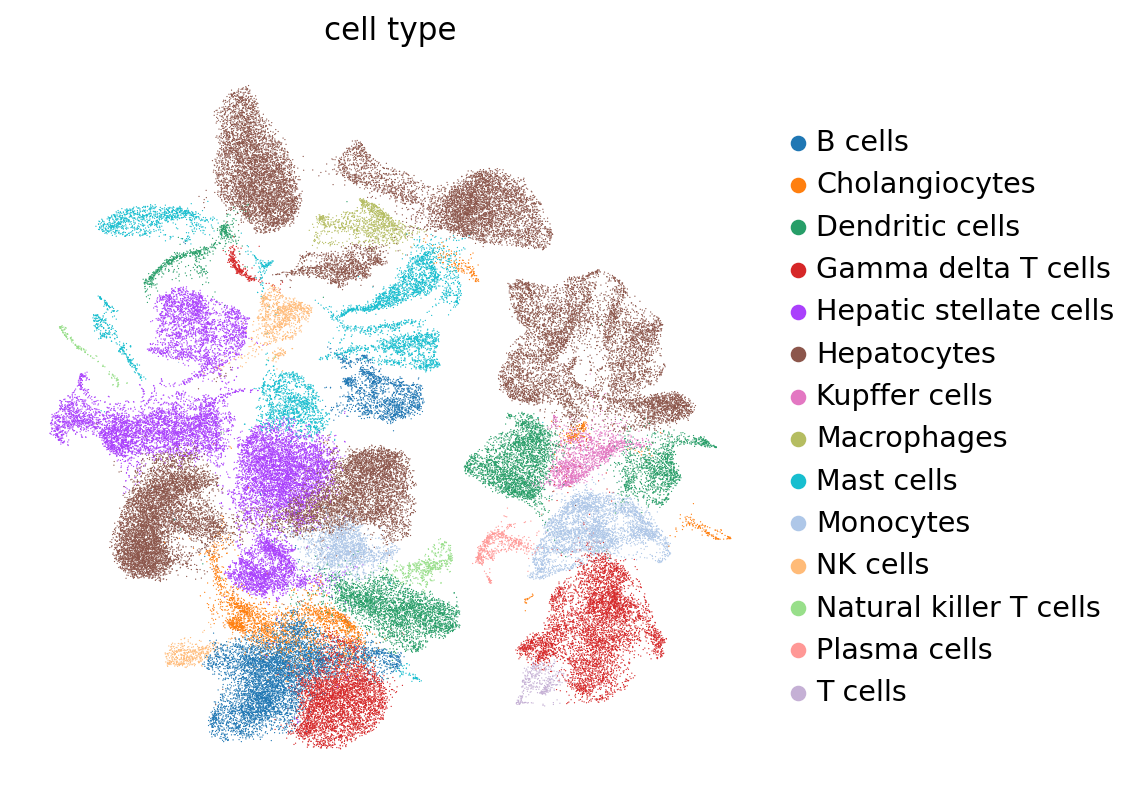

In [112]:
sc.pl.umap(adata, color = ['cell type'], frameon = False)

In [113]:
adata

AnnData object with n_obs × n_vars = 92578 × 11762
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'cell type'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap', 'rank_genes_groups', 'cell type_colors', 'scvi_markers', 'markers'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [114]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [116]:
adata.write_h5ad('/datos/home/jupyter-mdiaz/scRNAseq_pipeline/adata_saved/P5_labelled.h5ad')